In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'stress_testing_with_cols_nulls'
DB_COLLECTION_NAME = f'exp_{EXPERIMENT_NAME}'
DATASET_NAME = 'Folktables_Income_GA_2018'
EXPERIMENT_SESSION_UUID = '468547b3-837f-4b3a-8262-f66f2cc13783'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'AGEP', 'SEX&RAC1P', 'RAC1P&AGEP']
PREPROCESSING_TECHNIQUES = ['cat: mode, num: median']

In [6]:
MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier',
               'XGBClassifier', 'KNeighborsClassifier']

In [7]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [8]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(400, 29)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,AGEP_priv,RAC1P&AGEP_dis,RAC1P&AGEP_priv,RAC1P_dis,RAC1P_priv,SEX&RAC1P_dis,SEX&RAC1P_priv,SEX_dis,SEX_priv,overall
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,0,OK,2023-05-03 01:23:22.998,...,0.794913,0.801435,0.776675,0.810559,0.786873,0.828909,0.769935,0.816129,0.775701,0.7945
1,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,1,OK,2023-05-03 01:23:23.009,...,0.783784,0.787081,0.766749,0.796584,0.772861,0.814159,0.750327,0.806452,0.757944,0.7805
2,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,2,OK,2023-05-03 01:23:23.020,...,0.780604,0.794258,0.761787,0.801242,0.779499,0.823009,0.758170,0.812903,0.763551,0.7865
3,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,3,OK,2023-05-03 01:23:23.030,...,0.766296,0.775120,0.741935,0.787267,0.763274,0.799410,0.738562,0.796774,0.748598,0.7710
4,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,4,OK,2023-05-03 01:23:23.040,...,0.764706,0.784689,0.749380,0.787267,0.768437,0.802360,0.751634,0.794624,0.757009,0.7745
25,Accuracy,201,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,0,OK,2023-05-03 01:51:19.294,...,0.787597,0.828087,0.773672,0.824000,0.794182,0.831746,0.779452,0.817708,0.790385,0.8035
26,Accuracy,201,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,1,OK,2023-05-03 01:51:19.306,...,0.776744,0.813559,0.771363,0.804800,0.792727,0.815873,0.778082,0.811458,0.782692,0.7965
27,Accuracy,201,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,2,OK,2023-05-03 01:51:19.317,...,0.772093,0.808717,0.752887,0.809600,0.776727,0.822222,0.753425,0.809375,0.766346,0.7870
28,Accuracy,201,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,3,OK,2023-05-03 01:51:19.327,...,0.764341,0.813559,0.762125,0.798400,0.777455,0.806349,0.758904,0.801042,0.768269,0.7840
29,Accuracy,201,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_Income_GA_2018,200,4,OK,2023-05-03 01:51:19.337,...,0.755039,0.786925,0.732102,0.792000,0.758545,0.796825,0.742466,0.783333,0.755769,0.7690


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct()

In [12]:
exp_avg_group_metrics_dct = exp_composer.compose_group_metrics(exp_subgroup_metrics_dct)

## Metrics Visualization and Reporting

In [13]:
visualizer = ExperimentsVisualizer(exp_subgroup_metrics_dct=exp_subgroup_metrics_dct,
                                   exp_avg_runs_group_metrics_dct=exp_avg_group_metrics_dct,
                                   dataset_name=DATASET_NAME,
                                   model_names=MODEL_NAMES,
                                   sensitive_attrs=SENSITIVE_ATTRS)

### Subgroup metrics per dataset, experiment iteration, and model

In [14]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='variance',
                                                mode='max_num_columns')

alt.VConcatChart(...)

In [15]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='error',
                                                mode='max_num_columns')

alt.VConcatChart(...)

### Group metrics per dataset and model

In [16]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='variance',
                                             mode='max_num_columns')

alt.VConcatChart(...)

In [17]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='fairness',
                                             mode='max_num_columns')

alt.VConcatChart(...)

### Specific subgroup metric per dataset and multiple models

In [18]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Jitter',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES,
                                                          mode='max_num_columns')

alt.VConcatChart(...)

In [19]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Label_Stability',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES,
                                                          mode='max_num_columns')

alt.VConcatChart(...)

In [20]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='F1',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES,
                                                          mode='max_num_columns')

alt.VConcatChart(...)

In [21]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Accuracy',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES,
                                                          mode='max_num_columns')

alt.VConcatChart(...)

### Specific group metric per dataset, experiment iteration, and multiple models

In [22]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric=visualizer.all_group_variance_metrics_lst[1],
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES,
                                                       mode='max_num_columns')

alt.VConcatChart(...)

In [15]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric=visualizer.all_group_fairness_metrics_lst[3],
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES,
                                                       mode='max_num_columns')

alt.VConcatChart(...)

### Specific subgroup metric per dataset, one model, and multiple preprocessing techniques

In [24]:
visualizer.create_subgroups_grid_pct_lines_per_model_and_preprocessing_plot(subgroup_metric='Jitter',
                                                                            model_name=MODEL_NAMES[0],
                                                                            mode='max_num_columns')

alt.VConcatChart(...)

### Box plots for subgroup metrics per model and experiment iteration

In [14]:
# visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=1,
#                                                                    target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
#                                                                    subgroup_metrics_type='variance')

In [15]:
# visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=1,
#                                                                    target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
#                                                                    subgroup_metrics_type='error')

### Box plots for subgroup metrics per model and error level

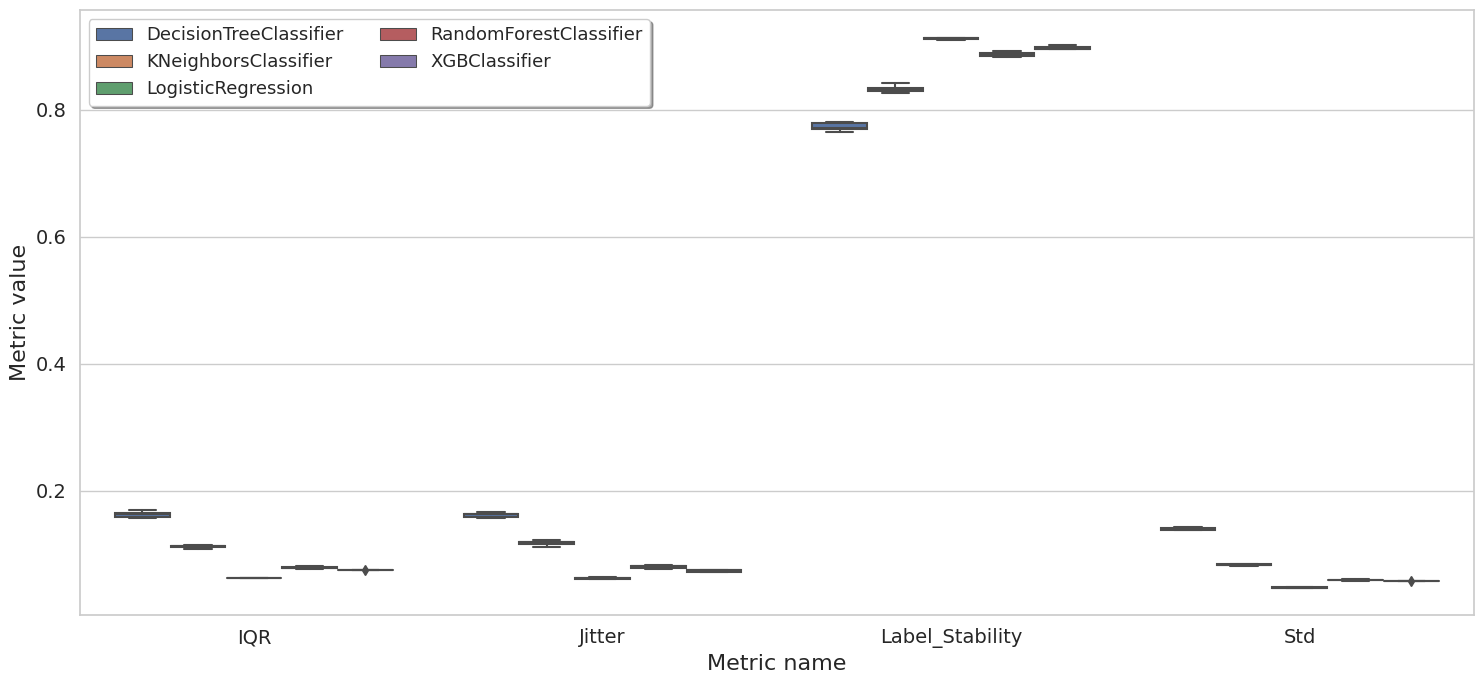

In [27]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='variance')

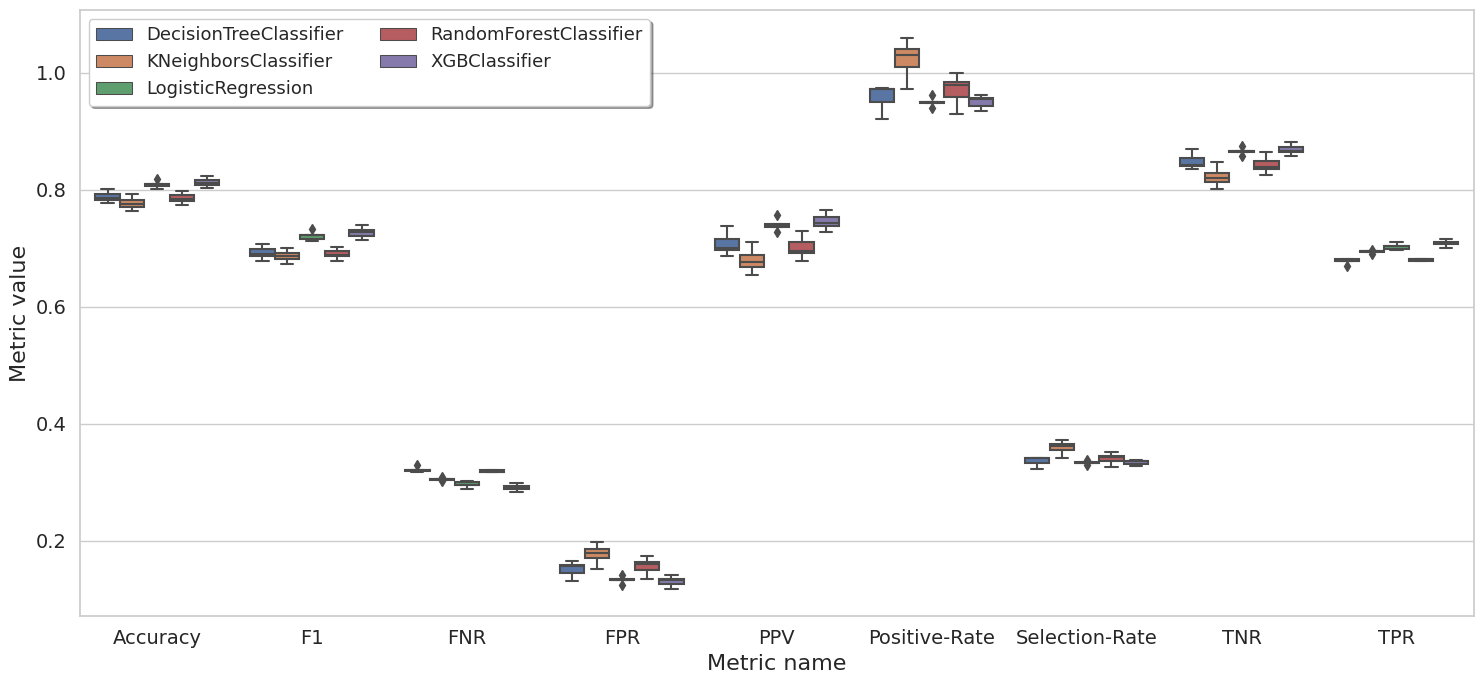

In [28]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='error')

### Box plots for group metrics per model and error level

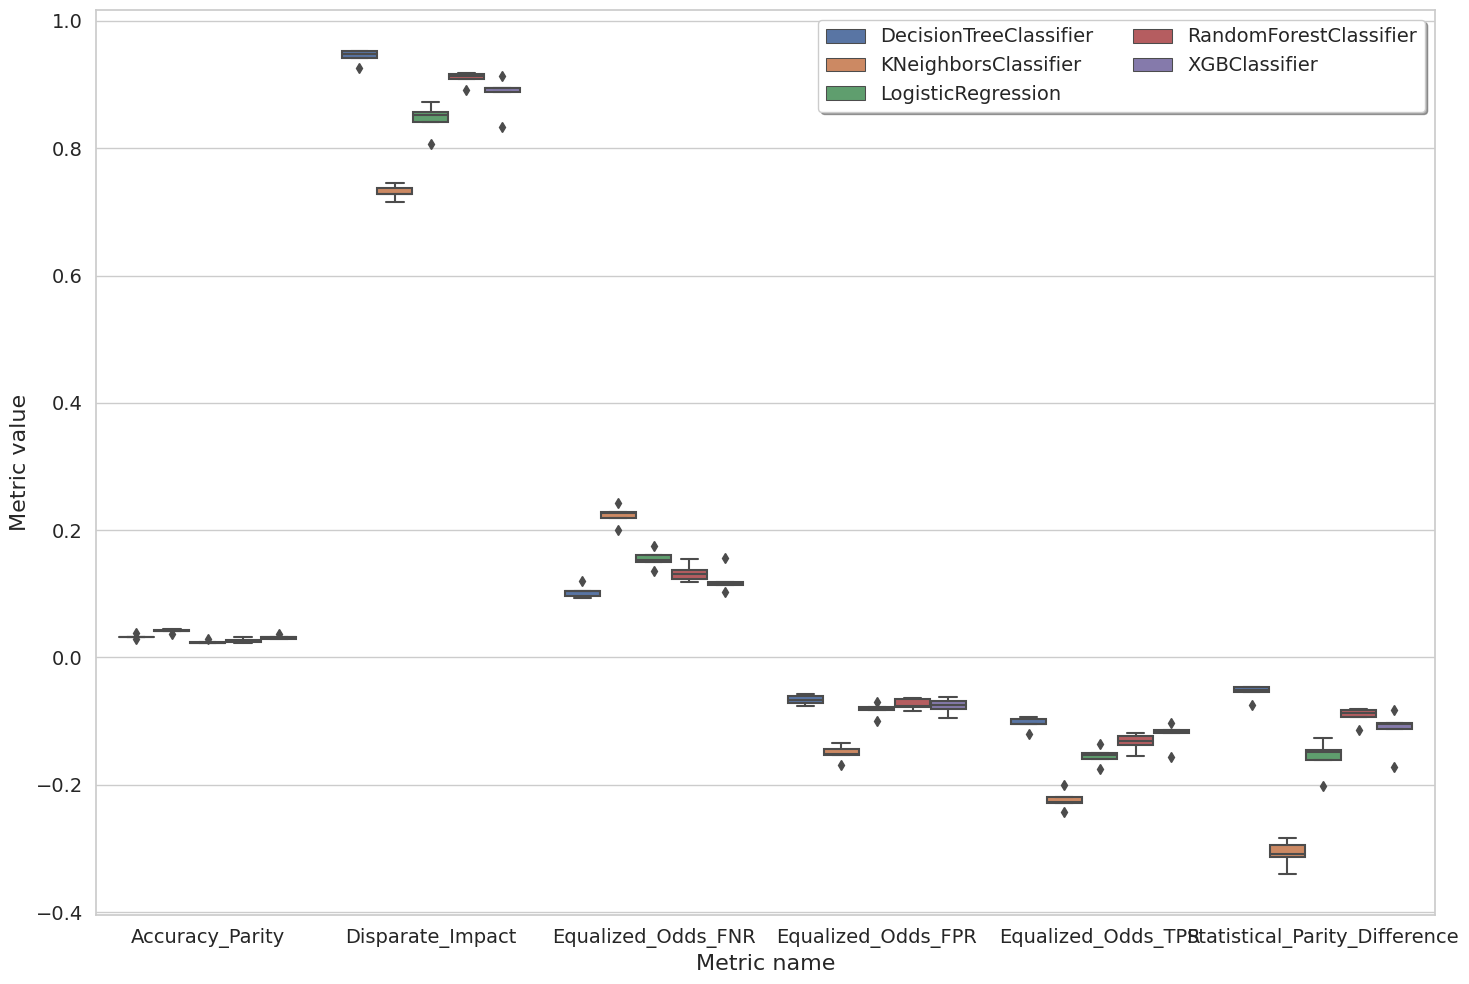

In [16]:
visualizer.create_group_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                  target_group='SEX',
                                                                  group_metrics_type='fairness')

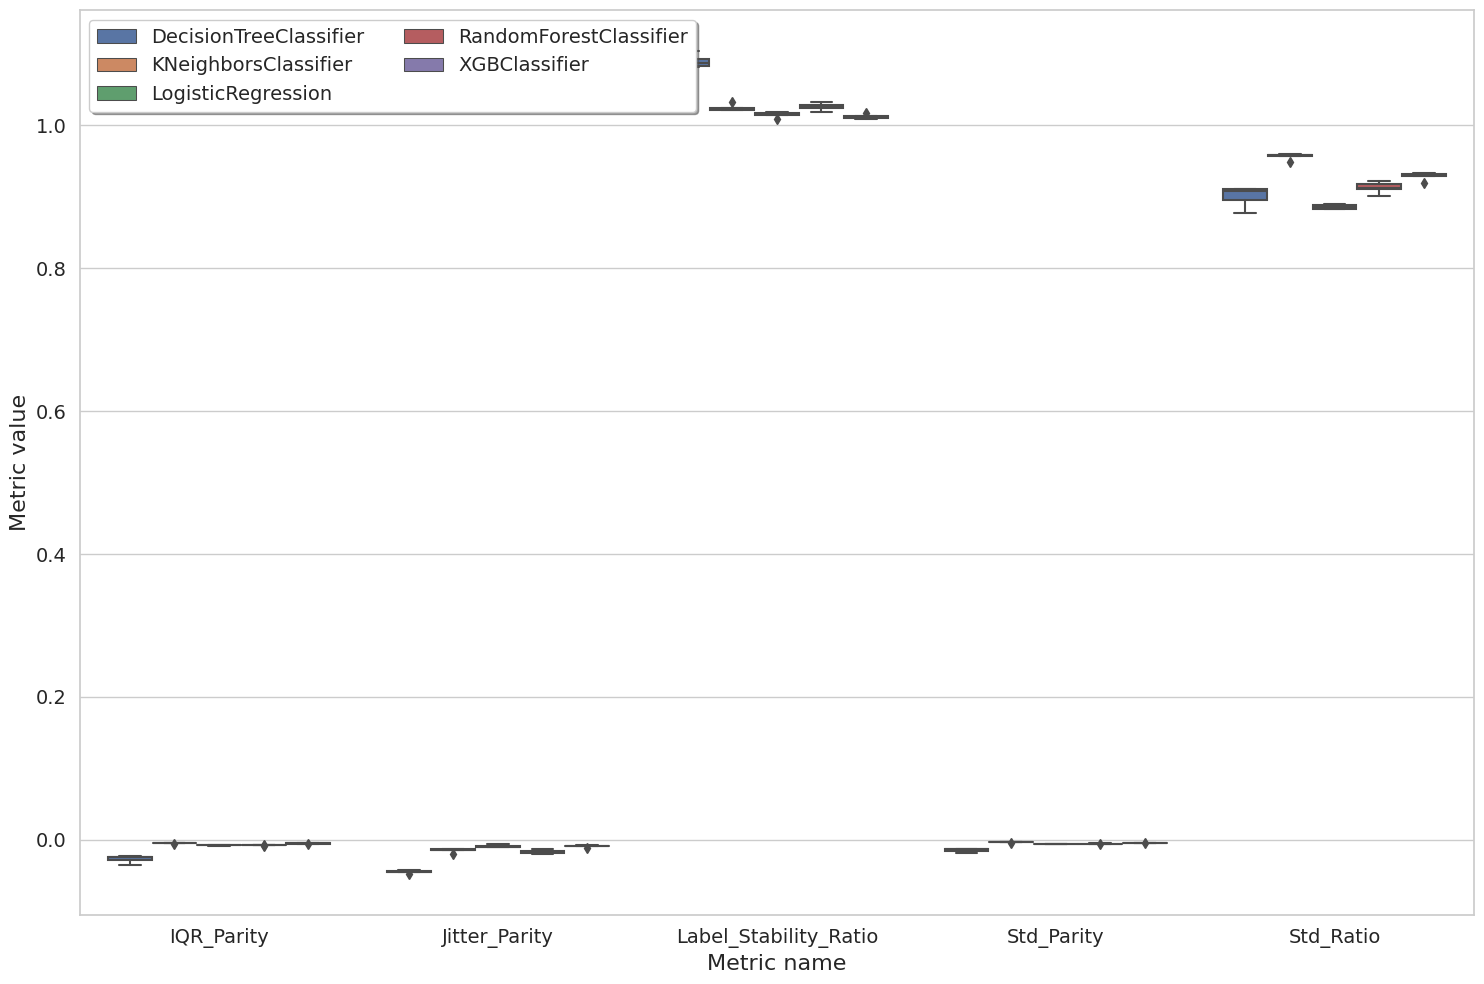

In [30]:
visualizer.create_group_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                  target_group='SEX',
                                                                  group_metrics_type='variance')

### One box plot for both error and variance metrics for subgroups

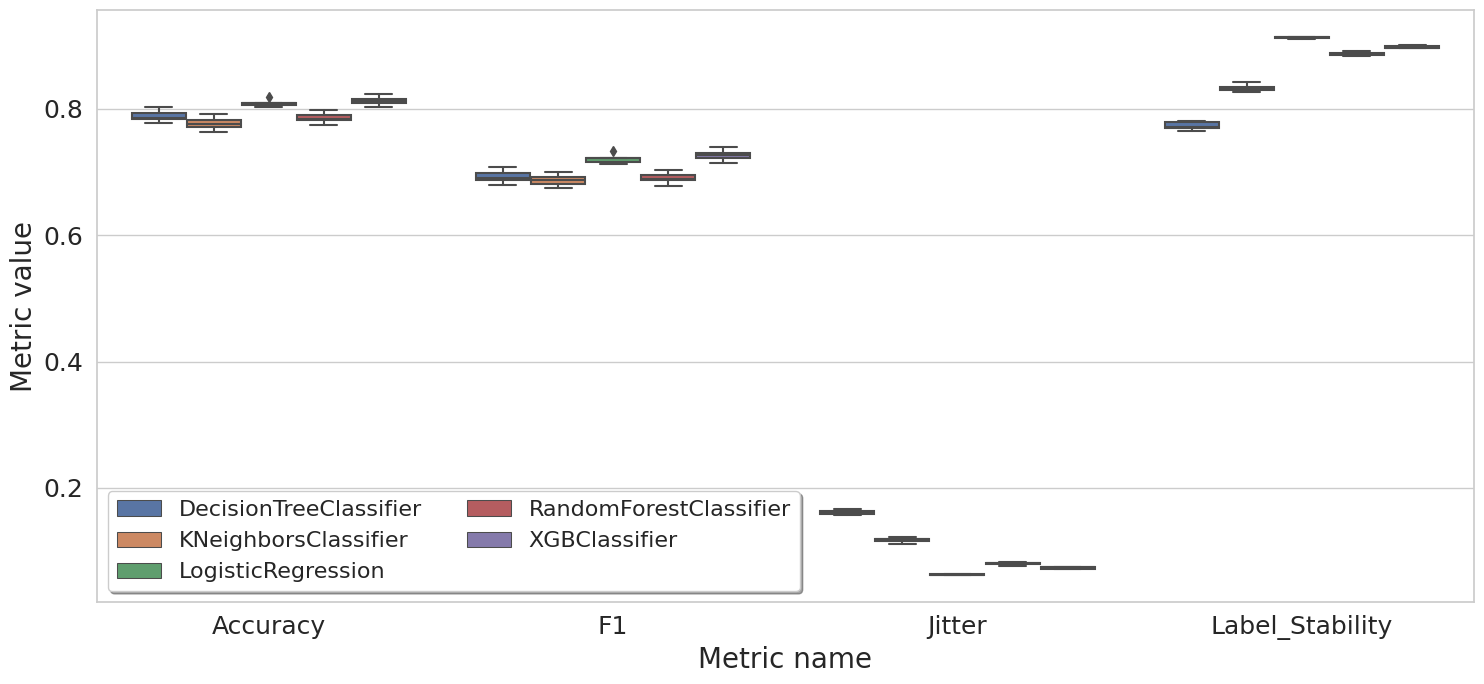

In [14]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics=['F1', 'Accuracy', 'Jitter', 'Label_Stability'],
                                                                     legend_loc='lower left')

In [17]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name='LogisticRegression',
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics=['Accuracy', 'F1', 'Jitter', 'Label_Stability'],
                                                mode='max_num_columns')

alt.VConcatChart(...)

In [14]:
# Model names: DecisionTreeClassifier, LogisticRegression, RandomForestClassifier, XGBClassifier, KNeighborsClassifier
visualizer.create_subgroups_grid_pct_lines_plot(model_name='XGBClassifier',
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics=['Accuracy', 'F1', 'Jitter', 'Label_Stability'],
                                                mode='max_num_columns')

alt.VConcatChart(...)

In [15]:
# Model names: DecisionTreeClassifier, LogisticRegression, RandomForestClassifier, XGBClassifier, KNeighborsClassifier
visualizer.create_grid_for_metrics_comparison(model_name='XGBClassifier',
                                              target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                              subgroup_metrics=['F1', 'Label_Stability'],
                                              group_metrics=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                              mode='max_num_columns')

alt.VConcatChart(...)